In [1]:
#加载库
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

plt.rcParams['font.family']='Microsoft YaHei'
plt.rcParams['axes.unicode_minus']=False

In [2]:
#加载数据集
ted = pd.read_csv(r"Seaborn/ted_main.csv")

In [3]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [4]:
#查看数据集行列数
print("该数据集共有 {} 行 {} 列".format(ted.shape[0],ted.shape[1])) 

该数据集共有 2550 行 17 列


In [5]:
#调整特征顺序
ted = ted[['name', 'title', 'description', 'main_speaker', 'speaker_occupation', 'num_speaker', 'duration', 'event', 'film_date', 'published_date', 'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url', 'views']]

In [6]:
#查看数据集的列
ted.columns

Index(['name', 'title', 'description', 'main_speaker', 'speaker_occupation',
       'num_speaker', 'duration', 'event', 'film_date', 'published_date',
       'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url',
       'views'],
      dtype='object')

原数据集中的film_date和published_date是用Unix timestamp表示的，我们使用datetime库，将其转换为可读的日期形式。

In [7]:
#调整拍摄日期&发布日期
import datetime

ted['film_date'] = ted['film_date'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%d-%m-%Y'))
ted['published_date'] = ted['published_date'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%d-%m-%Y'))

In [8]:
#显示调整后的数据集前两行
ted.head(2)

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,25-02-2006,27-06-2006,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520


In [9]:
# 检查空值
ted.isnull().any()

name                  False
title                 False
description           False
main_speaker          False
speaker_occupation     True
num_speaker           False
duration              False
event                 False
film_date             False
published_date        False
comments              False
tags                  False
languages             False
ratings               False
related_talks         False
url                   False
views                 False
dtype: bool

In [10]:
# 查看一下speaker_occupation缺失值的具体情况
ted[ted['speaker_occupation'].isnull()]

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
1113,Sonaar Luthra: Meet the Water Canary,Meet the Water Canary,"After a crisis, how can we tell if water is sa...",Sonaar Luthra,NaN,1,217,TEDGlobal 2011,14-07-2011,17-01-2012,145,"['TED Fellows', 'design', 'global development'...",38,"[{'id': 10, 'name': 'Inspiring', 'count': 73},...","[{'id': 523, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/sonaar_luthra_meet_t...,353749
1192,Rick Falkvinge: I am a pirate,I am a pirate,"The Pirate Party fights for transparency, anon...",Rick Falkvinge,NaN,1,1097,TEDxObserver,11-03-2012,01-04-2012,122,"['Internet', 'TEDx', 'global issues', 'politic...",10,"[{'id': 8, 'name': 'Informative', 'count': 156...","[{'id': 1329, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/rick_falkvinge_i_am_...,181010
1220,Gary Kovacs: Tracking our online trackers,Tracking our online trackers,"As you surf the Web, information is being coll...",Gary Kovacs,NaN,1,399,TED2012,29-02-2012,03-05-2012,257,"['Internet', 'advertising', 'business', 'priva...",32,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 9...","[{'id': 1370, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/gary_kovacs_tracking...,2098639
1656,Ryan Holladay: To hear this music you have to ...,To hear this music you have to be there. Liter...,"In this lovely talk, TED Fellow Ryan Holladay ...",Ryan Holladay,NaN,1,389,TED@BCG San Francisco,30-10-2013,11-01-2014,140,"['TED Fellows', 'entertainment', 'music', 'tec...",33,"[{'id': 1, 'name': 'Beautiful', 'count': 211},...","[{'id': 1152, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/ryan_holladay_to_hea...,1284510
1911,Brian Dettmer: Old books reborn as art,Old books reborn as art,What do you do with an outdated encyclopedia i...,Brian Dettmer,NaN,1,366,TEDYouth 2014,04-11-2014,07-02-2015,48,"['TEDYouth', 'art', 'books', 'creativity']",34,"[{'id': 1, 'name': 'Beautiful', 'count': 361},...","[{'id': 610, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/brian_dettmer_old_bo...,1159937
1949,Boniface Mwangi: The day I stood up alone,The day I stood up alone,Photographer Boniface Mwangi wanted to protest...,Boniface Mwangi,NaN,1,440,TEDGlobal 2014,20-10-2014,02-04-2015,70,"['TED Fellows', 'activism', 'art', 'corruption...",33,"[{'id': 3, 'name': 'Courageous', 'count': 614}...","[{'id': 1757, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/boniface_mwangi_boni...,1342431


In [11]:
# 各个column内容的描述性统计
ted.describe()

,num_speaker,duration,comments,languages,views
count,2550.000000,2550.000000,2550.000000,2550.000000,2.550000e+03
mean,1.028235,826.510196,191.562353,27.326275,1.698297e+06
std,0.207705,374.009138,282.315223,9.563452,2.498479e+06
min,1.000000,135.000000,2.000000,0.000000,5.044300e+04
25%,1.000000,577.000000,63.000000,23.000000,7.557928e+05
50%,1.000000,848.000000,118.000000,28.000000,1.124524e+06
75%,1.000000,1046.750000,221.750000,33.000000,1.700760e+06
max,5.000000,5256.000000,6404.000000,72.000000,4.722711e+07


In [12]:
# 单人演讲的比例
print("单人演讲占所有演讲的比例为{}%".format(round(sum(ted["num_speaker"] == 1)*100/len(ted), 1)))

#演讲时长小于18分钟的比例
print("时长小于18分钟的演讲数占所有演讲总数的{}%".format(round(sum(ted["duration"] <= 18*60)*100/len(ted), 1)))

单人演讲占所有演讲的比例为97.7%
时长小于18分钟的演讲数占所有演讲总数的79.1%


观察结论

- 演讲人数在1-5个人之间，大部分（97.7%）都是单人演讲；
- 演讲时长在135-5256秒之间，即2-88分钟之间，79.1%的演讲是小于18分钟以内的；
- 评论数在2-6404条之间，平均值在191.5条左右；
- 观看数在50,000-47,000,000次之间，平均值在1,700,000次左右；
- TED提供多种语言的选择，最多可以达到72种语言。

In [13]:
ted1 = ted.sort_values(by="views",ascending=False)
ted1

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1346,Amy Cuddy: Your body language may shape who yo...,Your body language may shape who you are,"Body language affects how others see us, but i...",Amy Cuddy,Social psychologist,1,1262,TEDGlobal 2012,26-06-2012,01-10-2012,2290,"['body language', 'brain', 'business', 'psycho...",51,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 605, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/amy_cuddy_your_body_...,43155405
677,Simon Sinek: How great leaders inspire action,How great leaders inspire action,Simon Sinek has a simple but powerful model fo...,Simon Sinek,Leadership expert,1,1084,TEDxPuget Sound,17-09-2009,04-05-2010,1930,"['TEDx', 'business', 'entrepreneur', 'leadersh...",45,"[{'id': 21, 'name': 'Unconvincing', 'count': 9...","[{'id': 814, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/simon_sinek_how_grea...,34309432
837,Brené Brown: The power of vulnerability,The power of vulnerability,Brené Brown studies human connection -- our ab...,Brené Brown,Vulnerability researcher,1,1219,TEDxHouston,06-06-2010,23-12-2010,1927,"['TEDx', 'communication', 'culture', 'depressi...",52,"[{'id': 10, 'name': 'Inspiring', 'count': 2144...","[{'id': 1391, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/brene_brown_on_vulne...,31168150
452,Mary Roach: 10 things you didn't know about or...,10 things you didn't know about orgasm,"""Bonk"" author Mary Roach delves into obscure s...",Mary Roach,Writer,1,1003,TED2009,06-02-2009,20-05-2009,354,"['books', 'culture', 'history', 'humor', 'scie...",37,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 16, 'hero': 'https://pe.tedcdn.com/ima...",https://www.ted.com/talks/mary_roach_10_things...,22270883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,Aleph Molinari: Let's bridge the digital divide!,Let's bridge the digital divide!,Five billion people can't use the Internet. Al...,Aleph Molinari,"Economist, techno-activist",1,594,TEDxSanMigueldeAllende,06-08-2011,04-02-2012,80,"['TEDx', 'global issues', 'poverty', 'technolo...",0,"[{'id': 26, 'name': 'Obnoxious', 'count': 9}, ...","[{'id': 892, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/aleph_molinari_let_s...,115346
776,Tim Birkhead: The early birdwatchers,The early birdwatchers,"Birds, a perennial human fascination, entertai...",Tim Birkhead,Ornithologist,1,1690,The Do Lectures,18-09-2009,26-09-2010,40,"['biology', 'birds', 'evolution', 'life']",0,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 571, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/tim_birkhead_the_wis...,112321
237,"Rokia Traore: ""Kounandi""","""Kounandi""","Singer-songwriter Rokia Traore performs ""Kouna...",Rokia Traore,Singer-songwriter,1,386,TEDGlobal 2007,06-06-2007,05-06-2008,43,"['Africa', 'guitar', 'live music', 'music', 's...",0,"[{'id': 22, 'name': 'Fascinating', 'count': 84...","[{'id': 186, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/rokia_traore_sings_k...,82488
1112,Charles Hazlewood + British Paraorchestra: The...,The debut of the British Paraorchestra,There are millions of prodigiously gifted musi...,Charles Hazlewood + British Paraorchestra,Contemporary music ensemble,2,816,TEDxBrussels,22-11-2011,15-01-2012,43,"['TEDx', 'disability', 'entertainment', 'globa...",0,"[{'id': 10, 'name': 'Inspiring', 'count': 105}...","[{'id': 1001, 'hero': 'htt

In [14]:
ted1.iloc[0:10]

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1346,Amy Cuddy: Your body language may shape who yo...,Your body language may shape who you are,"Body language affects how others see us, but i...",Amy Cuddy,Social psychologist,1,1262,TEDGlobal 2012,26-06-2012,01-10-2012,2290,"['body language', 'brain', 'business', 'psycho...",51,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 605, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/amy_cuddy_your_body_...,43155405
677,Simon Sinek: How great leaders inspire action,How great leaders inspire action,Simon Sinek has a simple but powerful model fo...,Simon Sinek,Leadership expert,1,1084,TEDxPuget Sound,17-09-2009,04-05-2010,1930,"['TEDx', 'business', 'entrepreneur', 'leadersh...",45,"[{'id': 21, 'name': 'Unconvincing', 'count': 9...","[{'id': 814, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/simon_sinek_how_grea...,34309432
837,Brené Brown: The power of vulnerability,The power of vulnerability,Brené Brown studies human connection -- our ab...,Brené Brown,Vulnerability researcher,1,1219,TEDxHouston,06-06-2010,23-12-2010,1927,"['TEDx', 'communication', 'culture', 'depressi...",52,"[{'id': 10, 'name': 'Inspiring', 'count': 2144...","[{'id': 1391, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/brene_brown_on_vulne...,31168150
452,Mary Roach: 10 things you didn't know about or...,10 things you didn't know about orgasm,"""Bonk"" author Mary Roach delves into obscure s...",Mary Roach,Writer,1,1003,TED2009,06-02-2009,20-05-2009,354,"['books', 'culture', 'history', 'humor', 'scie...",37,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 16, 'hero': 'https://pe.tedcdn.com/ima...",https://www.ted.com/talks/mary_roach_10_things...,22270883
1776,Julian Treasure: How to speak so that people w...,How to speak so that people want to listen,"Have you ever felt like you're talking, but no...",Julian Treasure,Sound consultant,1,598,TEDGlobal 2013,10-06-2013,27-06-2014,297,"['culture', 'sound', 'speech']",45,"[{'id': 24, 'name': 'Persuasive', 'count': 267...","[{'id': 1200, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/julian_treasure_how_...,21594632
201,Jill Bolte Taylor: My stroke of insight,My stroke of insight,Jill Bolte Taylor got a research opportunity f...,Jill Bolte Taylor,Neuroanatomist,1,1099,TED2008,27-02-2008,12-03-2008,2877,"['biology', 'brain', 'consciousness', 'global ...",49,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 184, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883
5,Tony Robbins: Why we do what we do,Why we do what we do,"Tony Robbins discusses the ""invisible forces"" ...",Tony Robbins,Life coach; expert in leadership psychology,1,1305,TED2006,02-02-2006,28-06-2006,672,"['business', 'culture', 'entertainment', 'goal...",36,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/tony_robbins_asks_wh...,20685401
2114,James Veitch: This is what happens when you re...,This is what happens when you reply to spam email,"Suspicious emails: unclaimed insurance bonds, ...",James Veitch,Comedian and writer,1,588,TEDGlobal>Geneva,08-12-2015,09-01-2016,150,"['comedy', 'communication', 'curiosity', 'humo...",43,"[{'id': 7, 'name': 'Funny', 'count': 7731}, {'...","[{'id': 2236, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/james_veitch_t

In [15]:
ted1['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

<AxesSubplot:xlabel='views'>

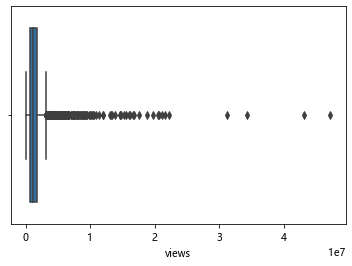

In [16]:
# 盒形图
sns.boxplot(ted1['views'])

<AxesSubplot:xlabel='views', ylabel='Density'>

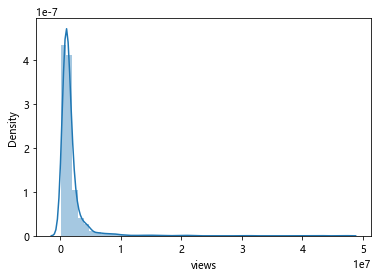

In [17]:
# 分布图
sns.distplot(ted1['views'])

In [18]:
# 浏览量小于4 million的比例
print("浏览量小于4 million的演讲视频数占总数的" + str(round(sum(ted["views"] <= 4000000)*100/len(ted), 1)) + "%")

浏览量小于4 million的演讲视频数占总数的93.5%


<AxesSubplot:xlabel='views', ylabel='Density'>

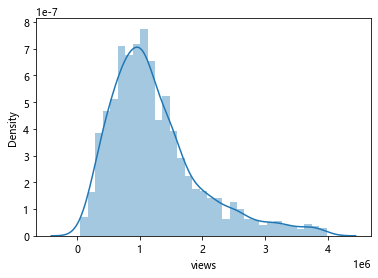

In [19]:
ted3 = ted[(ted["views"] < 4000000)]
sns.distplot(ted3["views"])

In [20]:
ted4 = ted.sort_values(by="comments",ascending=False)
ted5 = ted4[['title', 'main_speaker', 'views', 'comments', 'film_date', 'published_date']]
ted5 = ted5.iloc[0:10]

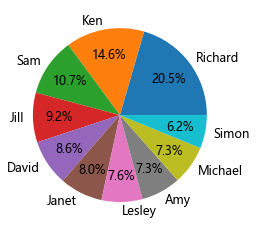

In [21]:
comments = [6404, 4553, 3356, 2877, 2673, 2492, 2374, 2290, 2272, 1930]
labels = ['Richard', 'Ken', 'Sam', 'Jill', 'David','Janet','Lesley','Amy','Michael','Simon']
plt.pie(x=comments, labels=labels,pctdistance=0.7,autopct='%.1f%%',textprops = {'fontsize':12, 'color':'k'})
plt.show()

<AxesSubplot:xlabel='comments'>

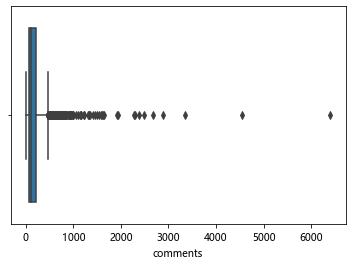

In [22]:
# 画出评论数的盒形图
sns.boxplot(ted['comments'])

<AxesSubplot:xlabel='comments', ylabel='Density'>

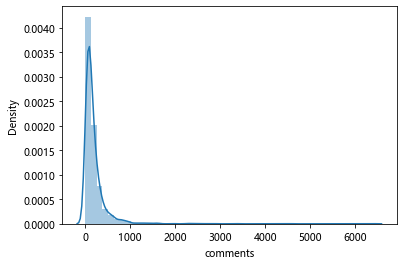

In [23]:
# 画出评论数的分布直方图
sns.distplot(ted['comments'])

In [24]:
# 计算出评论量小于500的比例
print("评论量小于500的比例" + str(round(sum(ted["comments"] <= 500)*100/len(ted), 1)) + "%")

评论量小于500的比例93.3%


<AxesSubplot:xlabel='comments', ylabel='Density'>

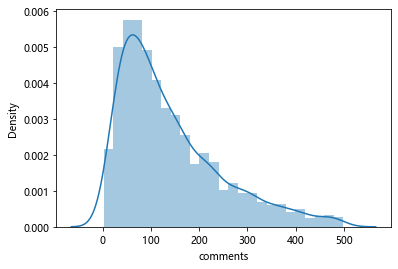

In [25]:
# 画出评论量小于500的分布直方图
com5ted = ted[(ted["comments"] < 500)]
sns.distplot(com5ted["comments"])

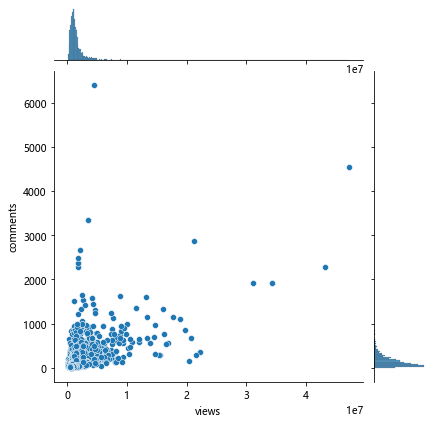

In [26]:
# 联合分布图jointplot
sns.jointplot('views', 'comments', data=ted)

In [27]:
# 浏览量和评论量的相关矩阵
#相关矩阵 corr
ted[['views', 'comments']].corr()

,views,comments
views,1.000000,0.530939
comments,0.530939,1.000000


In [28]:
#讨论指数
ted['dis_ind'] = round(ted['comments']/ted['views'] * 10000, 1)
ted.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views,dis_ind
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,1.0
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,25-02-2006,27-06-2006,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.8
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,24-02-2006,27-06-2006,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292,0.8
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,26-02-2006,27-06-2006,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550,1.2
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,1190,TED2006,22-02-2006,28-06-2006,593,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869,0.5


<AxesSubplot:xlabel='views', ylabel='dis_ind'>

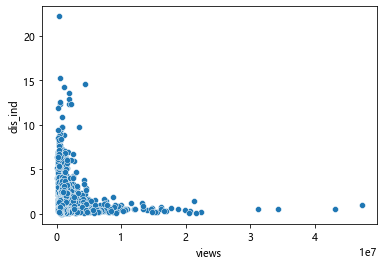

In [29]:
# 画出浏览量与评论指数的散点图
sns.scatterplot('views','dis_ind',data=ted)

In [30]:
# 月份和星期的顺序
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [31]:
# 加一列月份
ted['month'] = ted['film_date'].apply(lambda x: month_order[int(x.split('-')[1]) - 1])
month_df = pd.DataFrame(ted['month'].value_counts()).reset_index()
month_df.columns = ['month', 'talks']

In [32]:
# 定义获取星期的函数
def getday(x):
    day, month, year = (int(i) for i in x.split('-'))    
    answer = datetime.date(year, month, day).weekday()
    return day_order[answer]

In [33]:
# 加一列星期
ted['day'] = ted['film_date'].apply(getday)

In [34]:
day_df = pd.DataFrame(ted['day'].value_counts()).reset_index()
day_df.columns = ['day', 'talks']

In [35]:
# 添加年份列
ted['year'] = ted['film_date'].apply(lambda x: x.split('-')[2])
year_df = pd.DataFrame(ted['year'].value_counts().reset_index())
year_df.columns = ['year', 'talks']

In [36]:
tydata = year_df.sort_values(by="year",ascending=False)
tydata

,year,talks
9,2017,98
4,2016,246
5,2015,239
6,2014,237
1,2013,270
3,2012,267
0,2011,270
2,2010,267
7,2009,232
10,2008,84


In [37]:
tmdata = pd.DataFrame(month_df.values.T, index=month_df.columns, columns=month_df.index)
tmdata

,0,1,2,3,4,5,6,7,8,9,10,11
month,Feb,Mar,Jun,Jul,Nov,Oct,Apr,Dec,May,Sep,Jan,Aug
talks,601,397,270,253,232,208,173,123,123,107,33,30


In [38]:
tmdata = tmdata[[10, 0, 1, 6, 7, 2, 3, 11, 9, 5, 4, 8]]
tmdata

,10,0,1,6,7,2,3,11,9,5,4,8
month,Jan,Feb,Mar,Apr,Dec,Jun,Jul,Aug,Sep,Oct,Nov,May
talks,33,601,397,173,123,270,253,30,107,208,232,123


In [39]:
ted.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,tags,languages,ratings,related_talks,url,views,dis_ind,month,day,year
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,...,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,1.0,Feb,Sat,2006
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,25-02-2006,27-06-2006,...,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.8,Feb,Sat,2006
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,24-02-2006,27-06-2006,...,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292,0.8,Feb,Fri,2006
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,26-02-2006,27-06-2006,...,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550,1.2,Feb,Sun,2006
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,1190,TED2006,22-02-2006,28-06-2006,...,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869,0.5,Feb,Wed,2006


In [40]:
# 按年份和月份列进行分组
MY_data = ted.groupby([ted['year'],ted['month']],as_index=False).count()
# 取出年份、月份及dis_ind列
test = MY_data[['year','month','dis_ind']]

In [41]:
# 将年份、月份及dis_ind列做成数据透视表；
ptest = test.pivot('year','month','dis_ind')
ptest = ptest.fillna(0)

In [42]:
ptest = ptest[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

In [43]:
ptest

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1972,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1983,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1990,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1994,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002,0.0,24.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


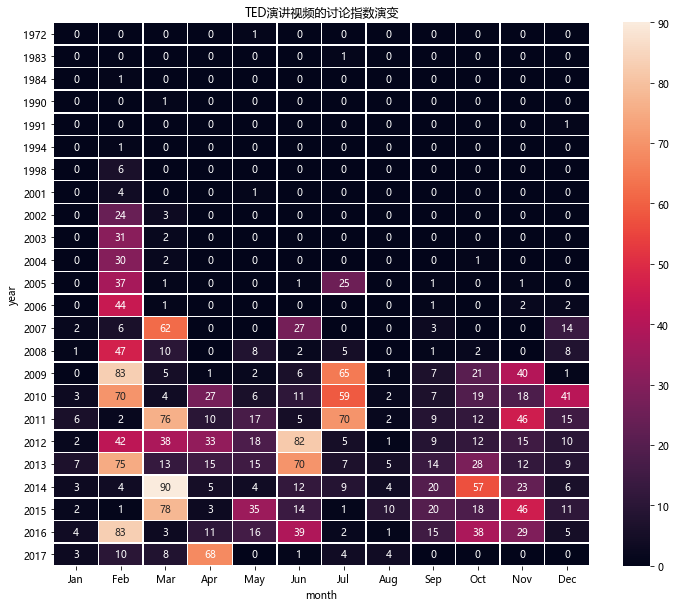

In [44]:
plt.figure(1,figsize=(12,10))
sns.heatmap(ptest, linewidths=.5, annot=True)
plt.title('TED演讲视频的讨论指数演变')
plt.show()

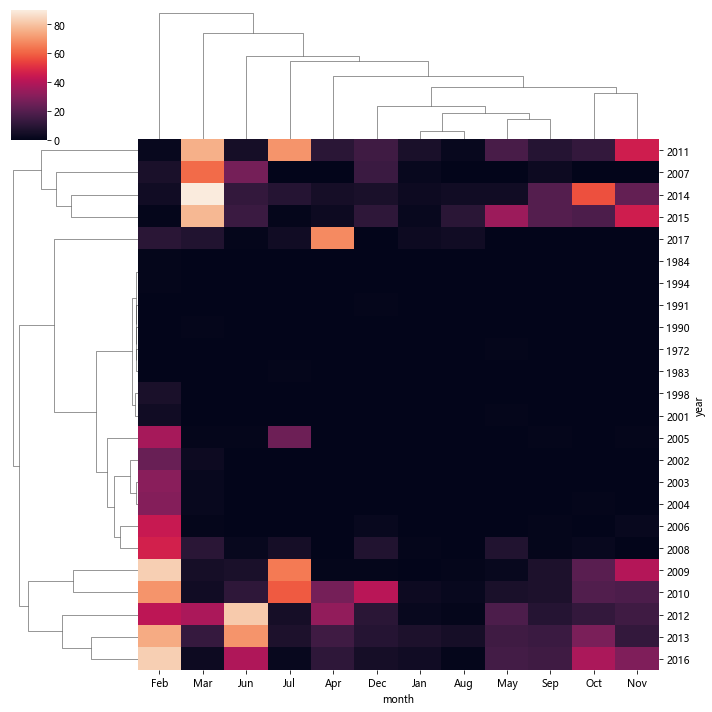

In [45]:
sns.clustermap(data=ptest)

In [46]:
# 演讲者出场次数
speaker_df = ted.groupby('main_speaker').count().reset_index()[['main_speaker', 'comments']]
speaker_df.columns = ['主要演讲者', '演讲次数']
speaker_df = speaker_df.sort_values('演讲次数', ascending=False)
speaker_df.head(10)

,主要演讲者,演讲次数
770,Hans Rosling,9
1066,Juan Enriquez,7
1693,Rives,6
1278,Marco Tempest,6
397,Clay Shirky,5
1487,Nicholas Negroponte,5
1075,Julian Treasure,5
424,Dan Ariely,5
850,Jacqueline Novogratz,5
248,Bill Gates,5


In [56]:
# 画出演讲者职业与演讲次数的条形图，观察哪一个职业更受欢迎
occupation_df = ted.groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'comments']]
occupation_df.columns = ['演讲者职业', '演讲次数']
occupation_df = occupation_df.sort_values('演讲次数', ascending = False)

In [57]:
occupation_df

,演讲者职业,演讲次数
1426,Writer,45
83,Artist,34
413,Designer,34
753,Journalist,33
515,Entrepreneur,31
...,...,...
554,"Eye surgeon, inventor",1
553,"Explorer, inventor and outer space dreamer",1
552,"Explorer, ethnographer",1
551,Explorer and filmmaker,1


In [58]:
ted_speaker = ted.groupby('speaker_occupation')['name'].nunique().sort_values(ascending=False)
ted_speaker.head()

speaker_occupation
Writer          45
Artist          34
Designer        34
Journalist      33
Entrepreneur    31
Name: name, dtype: int64

Text(0.5, 1.0, '受欢迎演讲者职业分布展示')

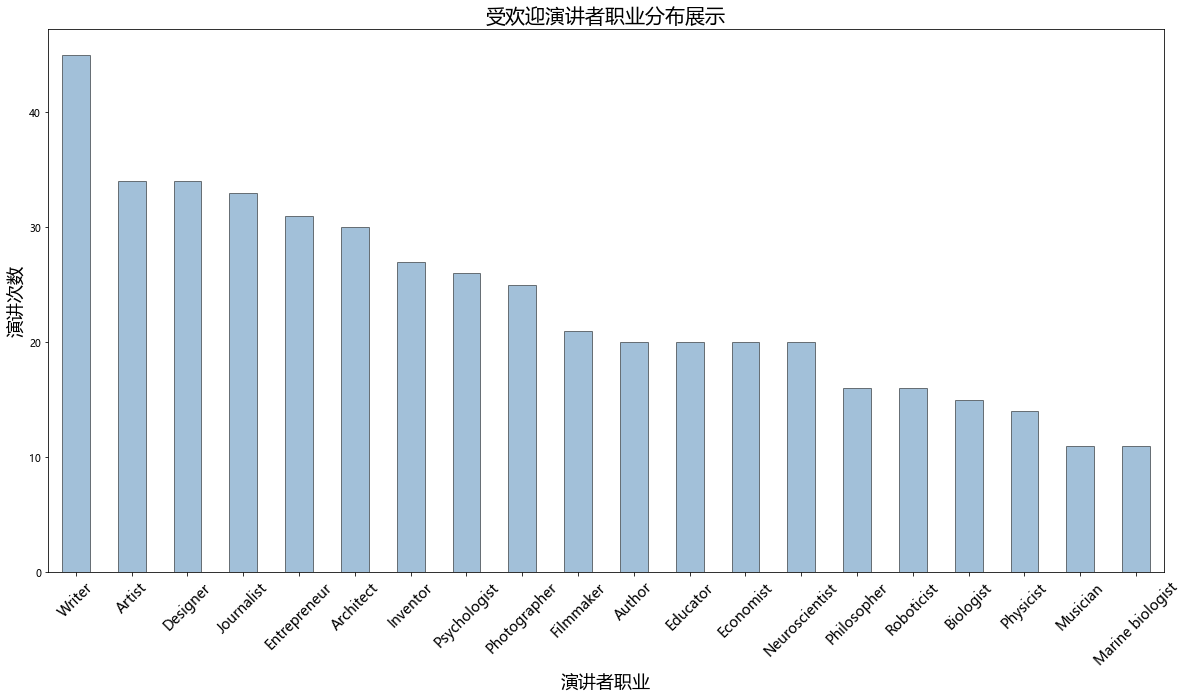

In [67]:
plt.figure(figsize=(20,10))
ted_speaker[ted_speaker.values>10].plot.bar(width=0.5, color='steelblue', edgecolor='k', alpha=0.5)
plt.xticks(rotation=45, size=14)
plt.xlabel('演讲者职业', size=18)
plt.ylabel('演讲次数', size=18)
plt.title('受欢迎演讲者职业分布展示', size=20)

Text(0, 0.5, '浏览量')

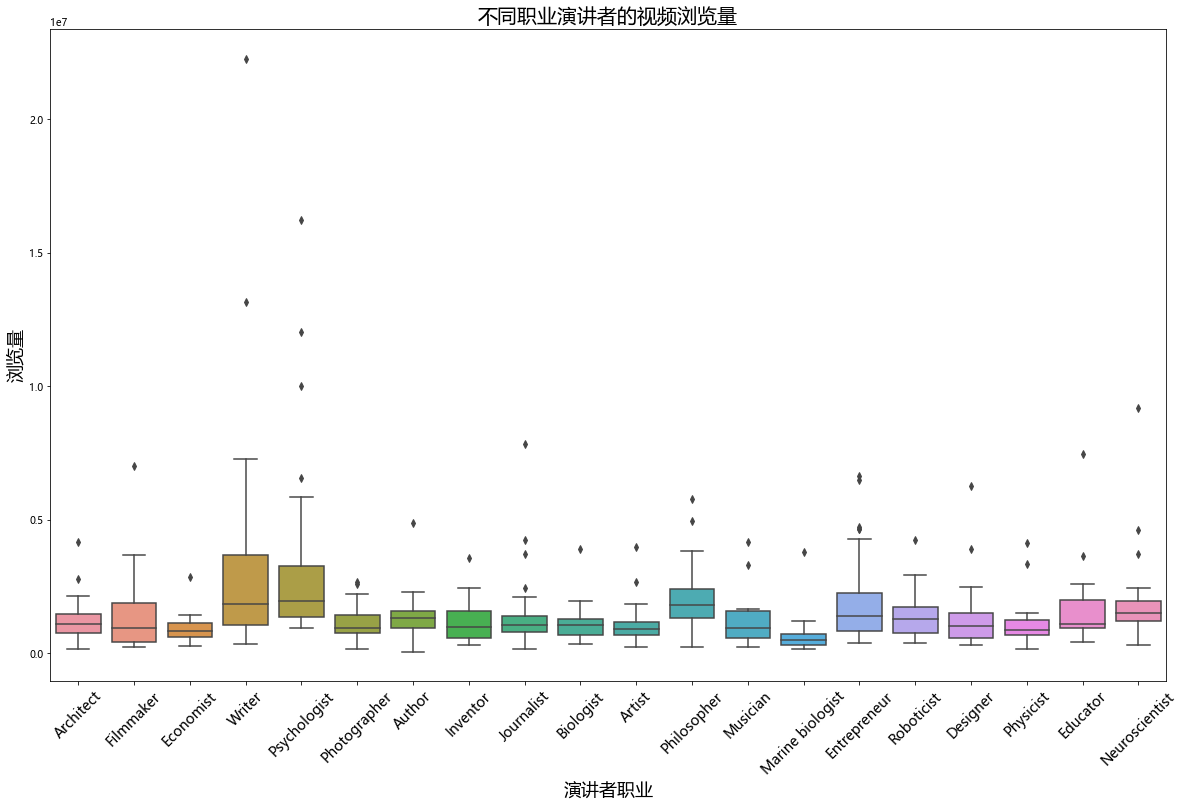

In [87]:
ted_speaker2 = ted.groupby('speaker_occupation')['name'].apply(lambda x: x.sort_values(ascending=False))
plt.figure(figsize=(20,12))
ax = sns.boxplot(y='views',x='speaker_occupation',data=ted[ted['speaker_occupation'].isin(ted_filter.head(20).index)])
ax.set_title("不同职业演讲者的视频浏览量", size=20)
plt.xticks(rotation=45, size=14)
ax.set_xlabel("演讲者职业", size=18)
ax.set_ylabel("浏览量", size=18)

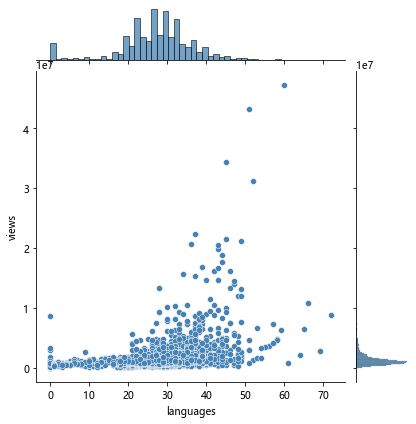

In [85]:
# 提供的语言数量和浏览量的相关关系，即画出其联合分布图
sns.jointplot(x="languages", y="views", data=ted,color='steelblue')